In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats ## will use for box cox and yeo johnson transformation
pd.set_option('display.max_columns', None)

# Load raw data
data = pd.read_csv('/content/newmamz.csv')

In [ ]:
# For null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           499 non-null    object 
 1   product_name         499 non-null    object 
 2   category             499 non-null    object 
 3   discounted_price     499 non-null    object 
 4   actual_price         499 non-null    object 
 5   discount_percentage  499 non-null    object 
 6   rating               499 non-null    float64
 7   rating_count         499 non-null    object 
 8   about_product        499 non-null    object 
 9   user_id              499 non-null    object 
 10  user_name            499 non-null    object 
 11  review_id            499 non-null    object 
 12  review_title         499 non-null    object 
 13  review_content       499 non-null    object 
 14  img_link             499 non-null    object 
 15  product_link         499 non-null    obj

In [ ]:
data.shape

(499, 17)

In [ ]:
data.isna().sum()


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
Units Sold             0
dtype: int64

In [ ]:
#For checking dupicate values
data.duplicated().values.any()

False

In [ ]:
  # List total number of rows and columns
print("This dataset contains ", data.shape[0], " rows and ", data.shape[1], " columns")

This dataset contains  499  rows and  17  columns


In [ ]:
# Clean data header name
namechange={"product_id":"Product ID", "product_name":"Product Name", "category":"Category", "discounted_price":"Discounted Price", "actual_price":"Actual Price", "discount_percentage":"Discount Percentage", "rating":"Rating", "rating_count":"Rating Count", "about_product":"About Product", "user_id":"User ID", "user_name":"User Name", "review_id":"Review ID", "review_title":"Review Title", "review_content":"Review Content", "img_link":"IMG Link", "product_link":"Product Link"}
data = data.rename(columns=namechange)

In [ ]:
# Understand first 5 rows of data
data.head()

,Product ID,Product Name,Category,Discounted Price,Actual Price,Discount Percentage,Rating,Rating Count,About Product,User ID,User Name,Review ID,Review Title,Review Content,IMG Link,Product Link,Units Sold
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,10
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,4
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,20
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,3
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,3


In [ ]:
# Check for duplicated rows
if data.duplicated().sum() == 0:
    print("No change in dataset as there is no duplicated rows.")
    print("Dataset remains as ", data.shape[0], " rows and ", data.shape[1], " columns")
else:
    # in the event of duplicated row, row with latest built year remains
    data = data.sort_values('YearBuilt').drop_duplicates(keep='last')
    print("Number of duplicated rows removed: ", data.duplicated().sum())
    print("After removing duplicated rows, dataset contains ", data.shape[0], " rows and ", data.shape[1], " columns")

No change in dataset as there is no duplicated rows.
Dataset remains as  499  rows and  17  columns


In [ ]:
# Check for null value in dataset
nullvalue = data.isna().sum()
nullvalue = nullvalue[nullvalue>0] / len(data) * 100
nullvalue = nullvalue.round(2).to_frame('%Null').sort_values('%Null', axis=0, ascending=False)
nullvalue

,%Null


In [ ]:
# Find out isnull rows in dataset
data[data["Rating Count"].isnull()] # 2 out of 1465 (0.14%) contains null
data = data.loc[~data['Rating Count'].isnull()] # remove from dataset

In [ ]:
# All row for Discount Price column is in Indian Rupee '₹'
data['Discounted Price'].str.contains('₹').sum() # 1463 out of 1463
data['Discounted Price'].str.contains('.').sum() # 1463 out of 1463

499

In [ ]:
# All row for Actual Price column is in Indian Rupee '₹'
data['Actual Price'].str.contains('₹').sum() # 1463 out of 1463
data['Actual Price'].str.contains('.').sum() # 1463 out of 1463

499

In [ ]:
# All row for percentage column contains '%'
data['Discount Percentage'].str.contains('%').sum() # 1463 out of 1463
data['Discount Percentage'].str.contains('.').sum() # 1463 out of 1463

499

In [ ]:
# Majority of rating count column contains ','
data['Rating Count'].str.contains(',').sum() # 1137 out of 1463
rc = data[~data['Rating Count'].str.contains(',', na=False)]
rc['Rating Count'].astype('float64').max() # remaining 326 out of 1463 is due to rating count lower than 1,000

3424.0

In [ ]:
# Replace symbols for relevant columns
data['Discounted Price'] = data['Discounted Price'].str.replace("₹",'').str.replace(",",'')
data['Actual Price'] = data['Actual Price'].str.replace("₹",'').str.replace(",",'')
data['Discount Percentage'] = data['Discount Percentage'].str.replace("%",'')
data['Rating Count'] = data['Rating Count'].str.replace(",",'')

In [ ]:
# Convert data type to float
data = data.astype({'Discounted Price': 'float64', 'Actual Price': 'float64', 'Discount Percentage': 'float64', 'Rating Count': 'float64'})

# Error occurred when converting rating. (ValueError: could not convert string to float: '|')

#Other alternatives to covert data type
#data['discounted_price'] = data['discounted_price'].astype('float64')
#data['actual_price'] = pd.to_numeric(data['actual_price'])

In [ ]:
# Resolve error for the conversion of rating
data.query('Rating == "|"') # 1 row without inputs for rating column. 
data = data.loc[data['Rating'] != '|'] # remove column from dataset

# Convet data type to float
data['Rating'] = data['Rating'].astype('float64')

In [ ]:
# Updates on dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product ID           499 non-null    object 
 1   Product Name         499 non-null    object 
 2   Category             499 non-null    object 
 3   Discounted Price     499 non-null    float64
 4   Actual Price         499 non-null    float64
 5   Discount Percentage  499 non-null    float64
 6   Rating               499 non-null    float64
 7   Rating Count         499 non-null    float64
 8   About Product        499 non-null    object 
 9   User ID              499 non-null    object 
 10  User Name            499 non-null    object 
 11  Review ID            499 non-null    object 
 12  Review Title         499 non-null    object 
 13  Review Content       499 non-null    object 
 14  IMG Link             499 non-null    object 
 15  Product Link         499 non-null    obj

,Product ID,Product Name,Category,Discounted Price,Actual Price,Discount Percentage,Rating,Rating Count,About Product,User ID,User Name,Review ID,Review Title,Review Content,IMG Link,Product Link,Units Sold
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,10
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,4
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,20
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,3
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,3


In [ ]:
# Explore split categories for ease of identification
catbreak = data['Category'].str.split('|', expand=True)
catbreak # Categories in the dataset can be broken down to 7 categories (0 to 6)

catbreaknull = catbreak.isna().sum()
catbreaknull = catbreaknull[catbreaknull>0] / len(catbreak) * 100
catbreaknull = catbreaknull.round(2).to_frame('%Null').sort_values('%Null', axis=0, ascending=False)
catbreaknull # to keep category 0 and 1

#catbreak[catbreak[2].isnull()]

,%Null
4,51.30
3,7.41


In [ ]:
def plotvariale(df, variable):
    plt.figure(figsize=(14,8))
    plt.subplot(1,2,1) ## means 1 row , 2 columns and 1st plot
    df[variable].hist(bins=30)
    
    ## QQ plot
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

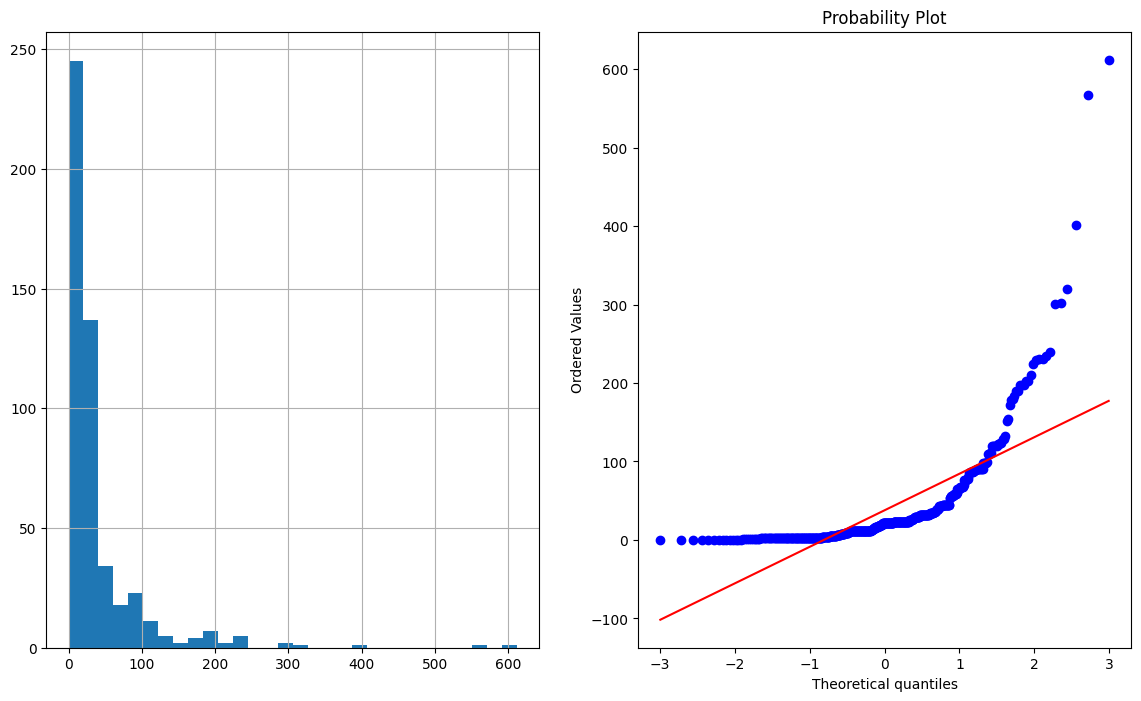

In [ ]:
plotvariale(data, 'Units Sold')


In [ ]:
data["Units Sold_yj"], lambdavalue = stats.yeojohnson(data['Units Sold'])
print("selected value for lambda is " , lambdavalue)


selected value for lambda is  0.0069199280612395435


<Axes: >

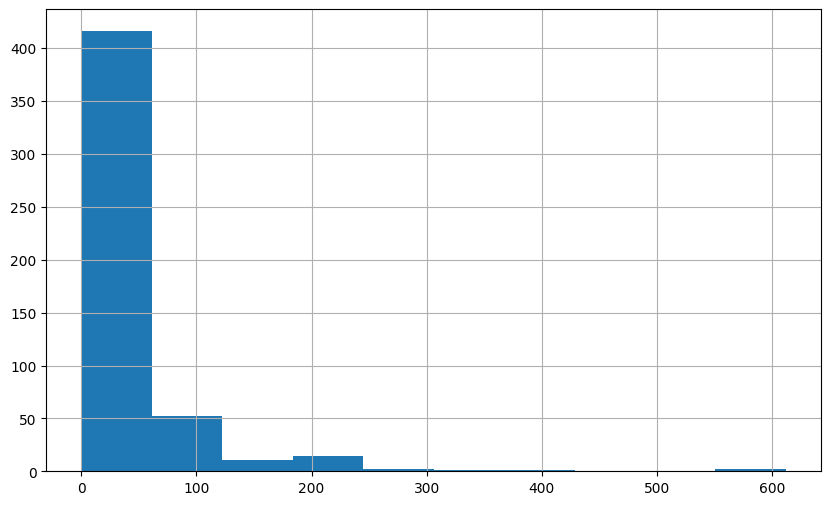

In [ ]:
data["Units Sold"].hist(figsize=(10,6))


<Axes: xlabel='Units Sold', ylabel='Count'>

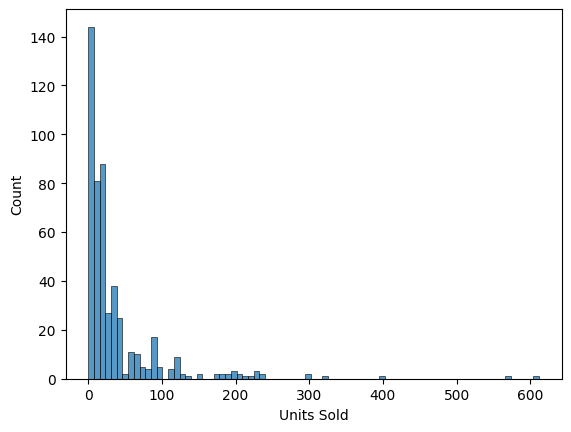

In [ ]:
sns.histplot(data['Units Sold'])


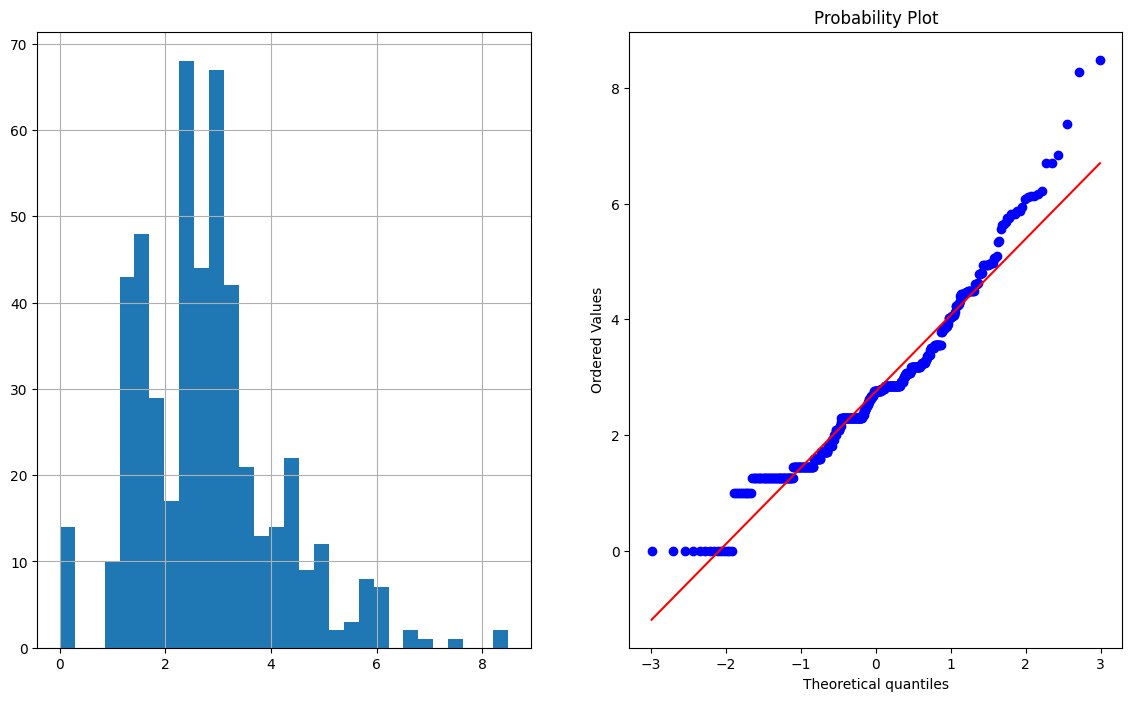

In [ ]:
#Exponential transformation for Units Sold

u_1=data["Units Sold_cbroot"] = data["Units Sold"] ** (1/3)
plotvariale(data,"Units Sold_cbroot")

In [ ]:
#Shapiro test for Units Sold
from scipy.stats import shapiro

u_1 = data["Units Sold"] ** (1/3)
stat, p = shapiro(u_1)

print("Shapiro-Wilk test statistics: ", stat)
print("p-value: ", p)


Shapiro-Wilk test statistics:  0.952628493309021
p-value:  1.4634144590575104e-11


<Axes: >

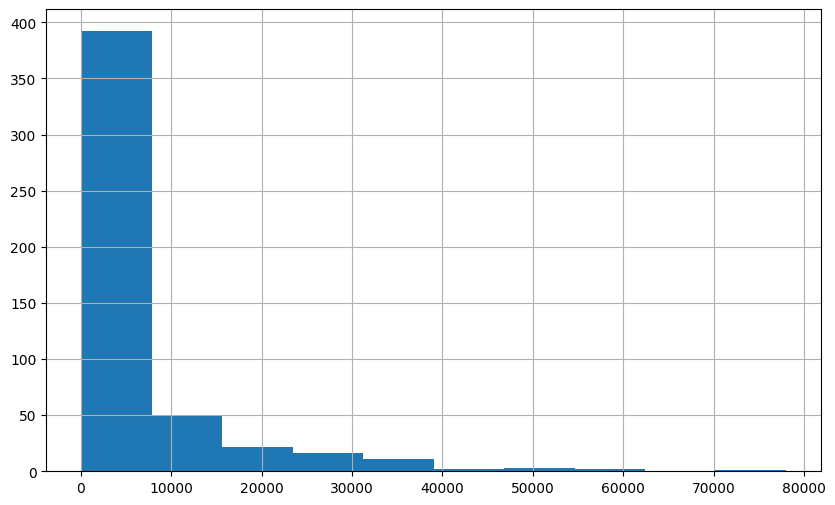

In [ ]:
data["Discounted Price"].hist(figsize=(10,6))


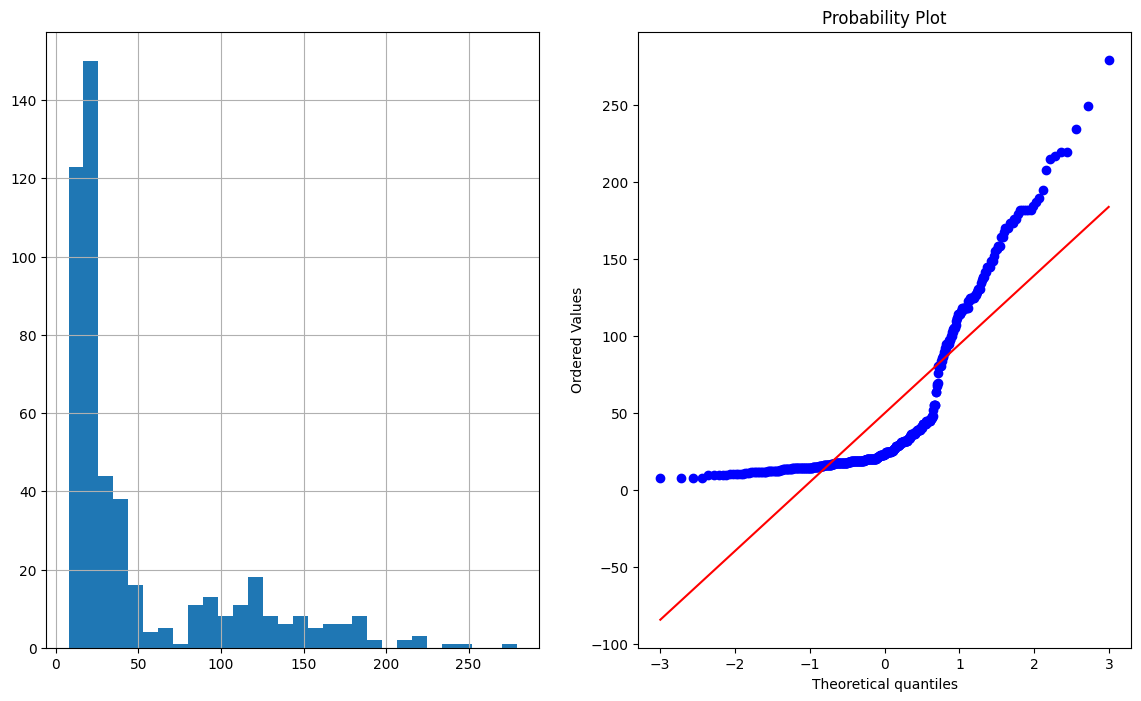

In [ ]:
#Square root transformation for discounted price

d_1=data["Discounted Price_sqroot"] = data["Discounted Price"] ** (1/2)
plotvariale(data,"Discounted Price_sqroot")

In [ ]:
#Shapiro test for Discounted Price
from scipy.stats import shapiro

d_1 = data["Units Sold"] ** (1/3)
stat, p = shapiro(d_1)

print("Shapiro-Wilk test statistics: ", stat)
print("p-value: ", p)


Shapiro-Wilk test statistics:  0.952628493309021
p-value:  1.4634144590575104e-11


<Axes: >

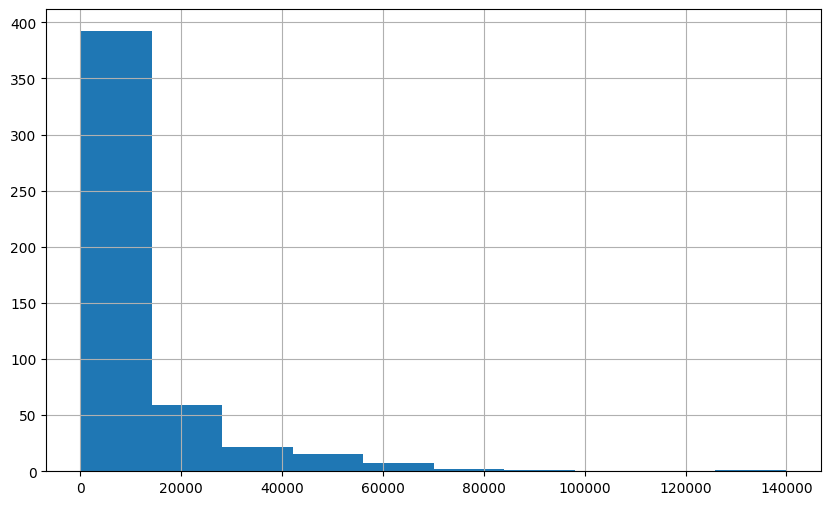

In [ ]:
data["Actual Price"].hist(figsize=(10,6))


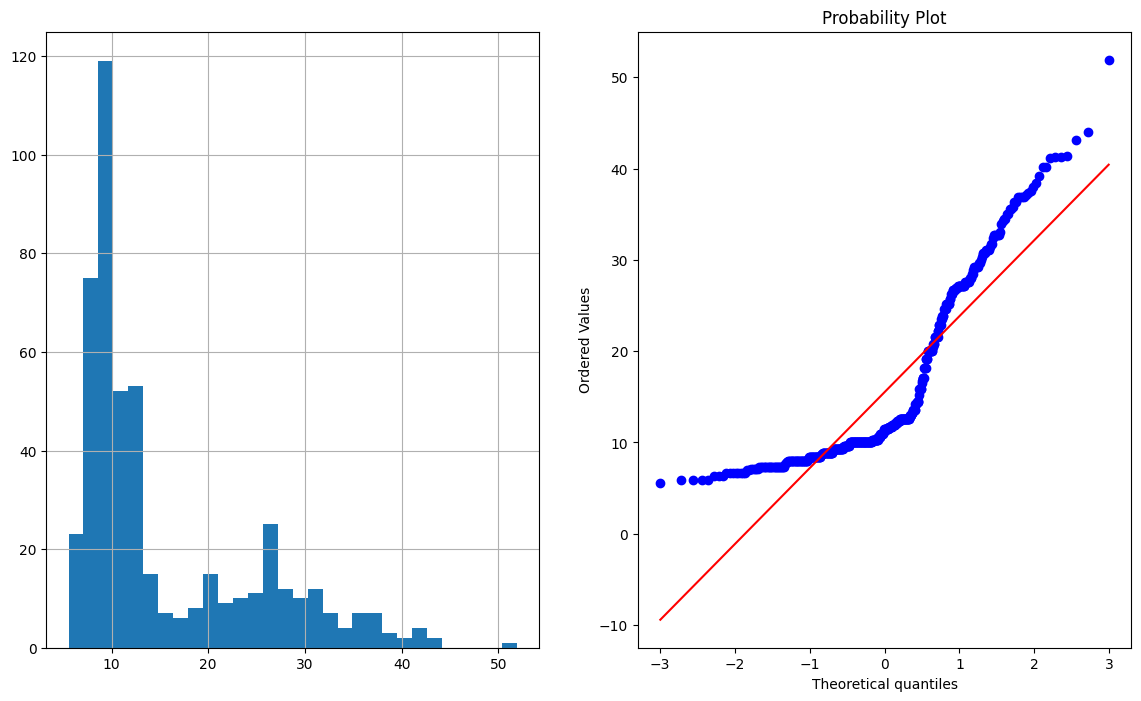

In [ ]:
#Exponential transformation for Actual Price

a_1=data["Actual Price_cbroot"] = data["Actual Price"] ** (1/3)
plotvariale(data,"Actual Price_cbroot")

In [ ]:
#Shapiro test for Actual Price
from scipy.stats import shapiro

a_1 = data["Actual Price"] ** (1/3)
stat, p = shapiro(a_1)

print("Shapiro-Wilk test statistics: ", stat)
print("p-value: ", p)

Shapiro-Wilk test statistics:  0.8121012449264526
p-value:  1.116262556689703e-23


In [ ]:
# Calculate the correlation coefficient between product price and unit sold
corr_coef = data['Actual Price'].corr(data['Units Sold'])

print('Correlation coefficient:', corr_coef)


Correlation coefficient: -0.12147746139516165


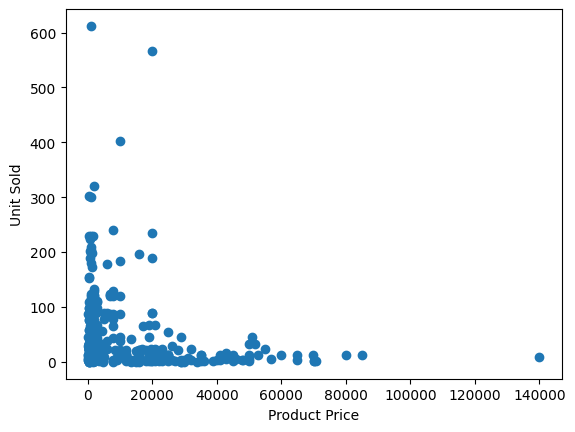

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['Actual Price'], data['Units Sold'])
plt.xlabel('Product Price')
plt.ylabel('Unit Sold')
plt.show()


In [ ]:
# Calculate the correlation coefficient between discount and unit sold
corr_coef = data['Discounted Price'].corr(data['Units Sold'])

print('Correlation coefficient:', corr_coef)


Correlation coefficient: -0.1922212090286725


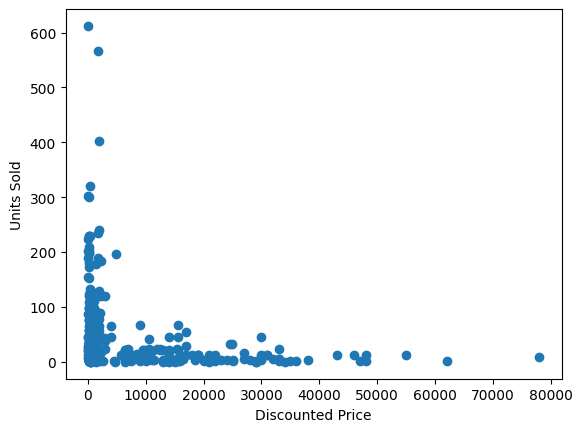

In [ ]:
plt.scatter(data['Discounted Price'], data['Units Sold'])
plt.xlabel('Discounted Price')
plt.ylabel('Units Sold')
plt.show()


<ipython-input-39-e36747611cff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


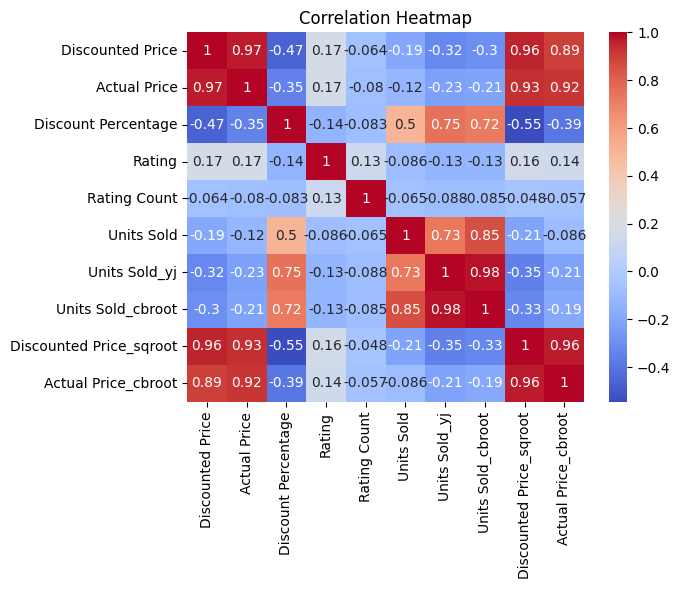

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
import statsmodels.api as sm



                            OLS Regression Results                            
Dep. Variable:           Actual Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     7.444
Date:                Sat, 29 Apr 2023   Prob (F-statistic):            0.00659
Time:                        18:39:46   Log-Likelihood:                -5521.5
No. Observations:                 499   AIC:                         1.105e+04
Df Residuals:                     497   BIC:                         1.106e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9766.4220    809.934     12.058      0.0

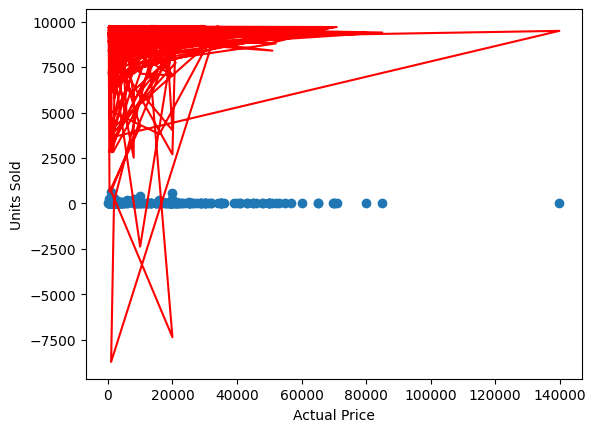

In [ ]:
# Fit a linear regression model
model = sm.OLS(data['Actual Price'], sm.add_constant(data['Units Sold'])).fit()

# Print the regression coefficients and p-values
print(model.summary())

# Plot a scatter plot and regression line to visualize the relationship between actual price and units sold
plt.scatter(data['Actual Price'], data['Units Sold'])
plt.xlabel('Actual Price')
plt.ylabel('Units Sold')
plt.plot(data['Actual Price'], model.predict(), color='red')
plt.show()

                            OLS Regression Results                            
Dep. Variable:             Units Sold   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     19.07
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.54e-05
Time:                        18:39:46   Log-Likelihood:                -2763.1
No. Observations:                 499   AIC:                             5530.
Df Residuals:                     497   BIC:                             5539.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               43.9143      3.096  

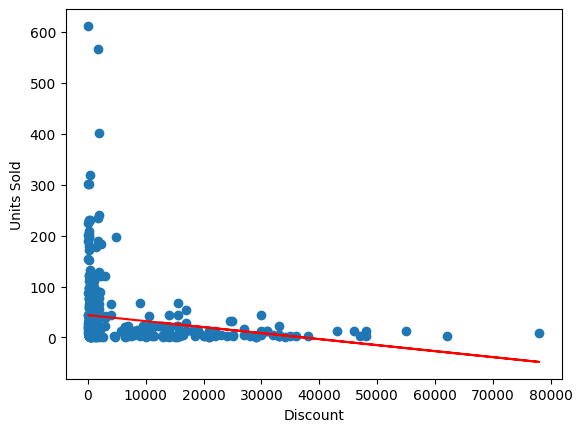

In [ ]:
import statsmodels.api as sm

# Fit a linear regression model
model = sm.OLS(data['Units Sold'], sm.add_constant(data['Discounted Price'])).fit()

# Print the regression coefficients and p-values
print(model.summary())

# Plot a scatter plot and regression line to visualize the relationship between discount and units sold
plt.scatter(data['Discounted Price'], data['Units Sold'])
plt.xlabel('Discount')
plt.ylabel('Units Sold')
plt.plot(data['Discounted Price'], model.predict(), color='red')
plt.show()


In [ ]:
#For Business Q1 
X = data['Actual Price']
y = data['Units Sold']

X = sm.add_constant(X)

model_1 = sm.OLS(y, X).fit()


In [ ]:
#For Business Q2

X1 = data['Discounted Price']
y1 = data['Units Sold']

X = sm.add_constant(X)

model_2 = sm.OLS(y1, X1).fit()


In [ ]:
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:             Units Sold   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     7.444
Date:                Sat, 29 Apr 2023   Prob (F-statistic):            0.00659
Time:                        18:39:46   Log-Likelihood:                -2768.8
No. Observations:                 499   AIC:                             5542.
Df Residuals:                     497   BIC:                             5550.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9777      3.187     13.171   

In [ ]:
print(model_2.summary())


                                 OLS Regression Results                                
Dep. Variable:             Units Sold   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):              0.006
Method:                 Least Squares   F-statistic:                              3.915
Date:                Sat, 29 Apr 2023   Prob (F-statistic):                      0.0484
Time:                        18:39:46   Log-Likelihood:                         -2847.9
No. Observations:                 499   AIC:                                      5698.
Df Residuals:                     498   BIC:                                      5702.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------